# cadena de gimnasios Model Fitness

En esta investigación se realizarán análisis a un datset de una cadena de gimnasios Model Fitness, para estudiar el perfil de sus clientes, analizarlos y elaborar una estrategia de retención; con el fin de enfrentar el problema de pérdida de clientes.


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Estudiar y comprobar los datos.
4. Construir un modelo para predecir la cancelación de usuarios.
5. Crear clústeres de usuarios.
6. Escribir una conclusión general.

## Descargar los datos

In [1]:
#Cargar las librerías
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

In [2]:
gym_data = pd.read_csv('/datasets/gym_churn_us.csv')
gym_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Llevar a cabo el análisis exploratorio de datos (EDA)

In [3]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Se puede observar que no se encontraron valores ausentes en el dataset.

In [4]:
gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Aqui se puede apreciar la distribución de las medias, las desviaciones estandar, y otros valores en las columnas del dataframe.

### Observa los valores medios de las características en dos grupos: para los que se fueron (cancelación) y para los que se quedaron (utiliza el método groupby()).


In [5]:
gym_data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


En esta tabla se puede apreciar, los valores medios en todas las columnas del dataset en ambos grupos de las personas que cancelaron(1) y las que se quedaron(0).

### Traza histogramas de barras y distribuciones de características para aquellos que se fueron (cancelación) y para los que se quedaron

In [6]:
people_that_stayed = gym_data.query('Churn == 0')
people_that_stayed.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


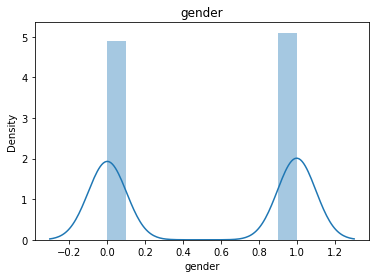

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


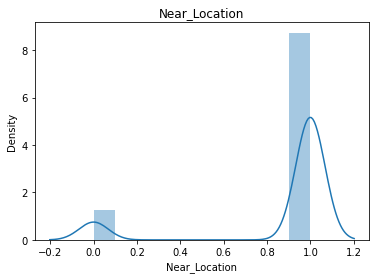

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


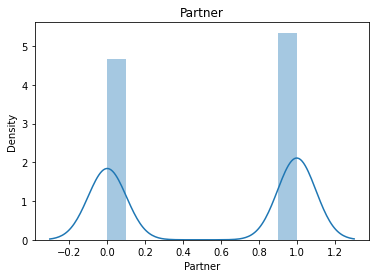

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


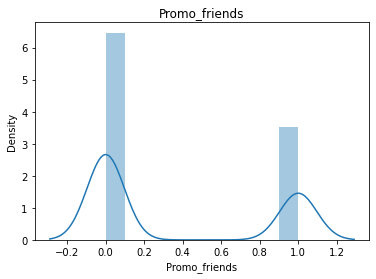

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


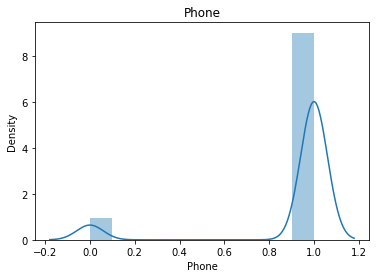

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


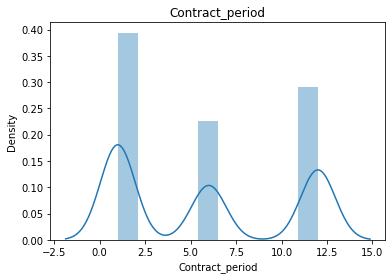

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


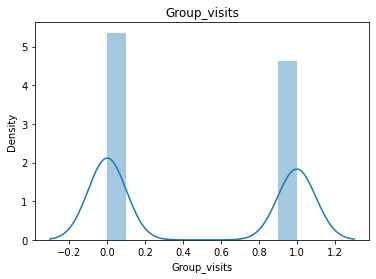

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


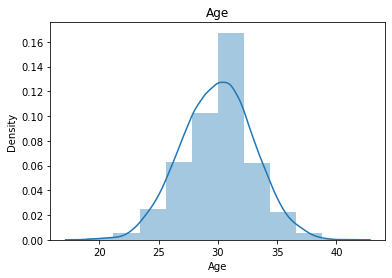

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


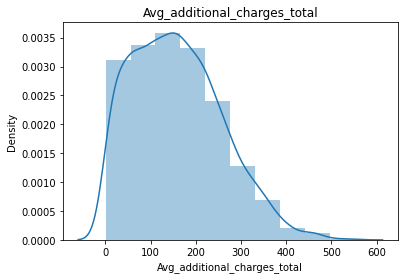

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


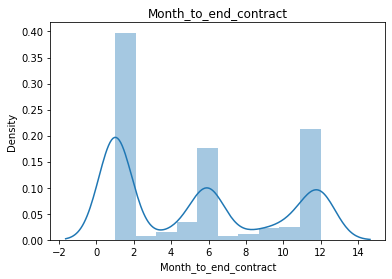

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


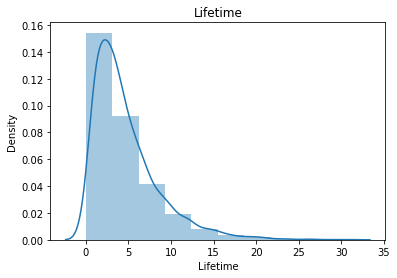

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


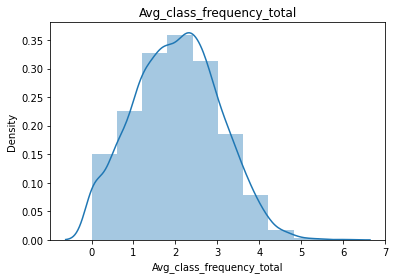

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


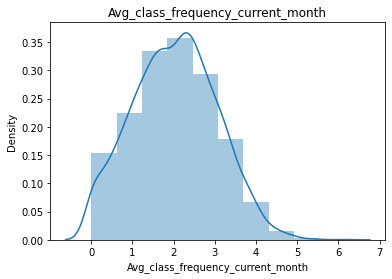

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


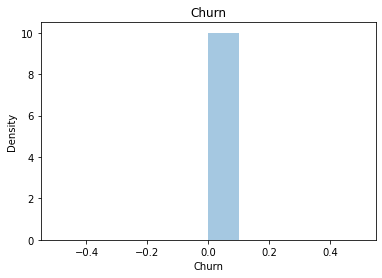

In [7]:
for feature in people_that_stayed.columns:
    sns.distplot(people_that_stayed[feature], bins=10)
    plt.title(feature)
    plt.show()

In [8]:
people_that_left = gym_data.query('Churn == 1')
people_that_left.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


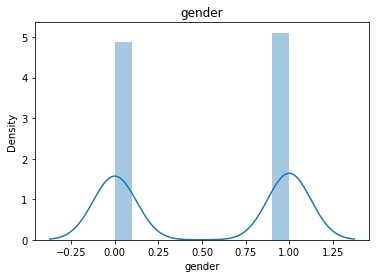

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


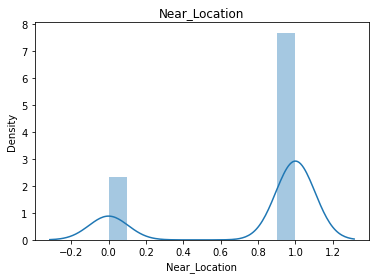

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


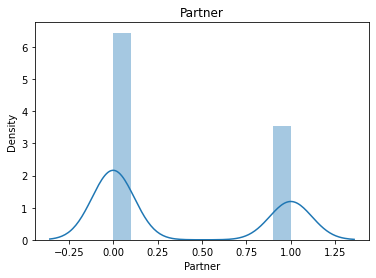

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


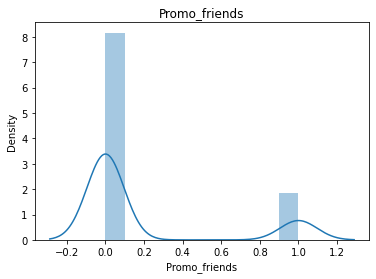

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


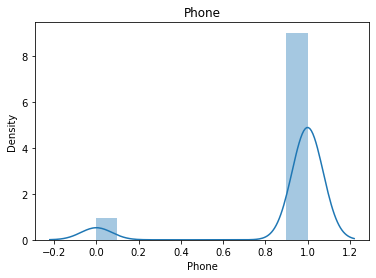

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


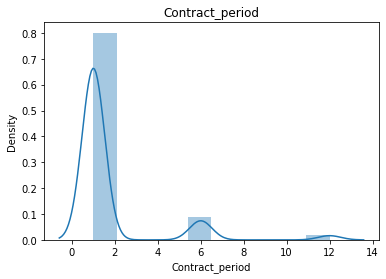

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


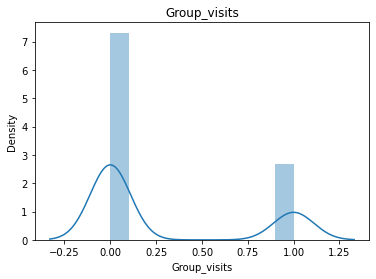

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


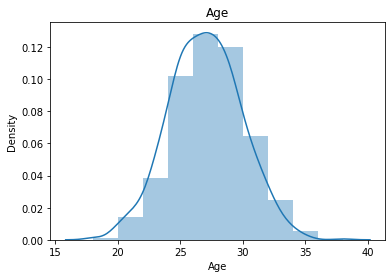

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


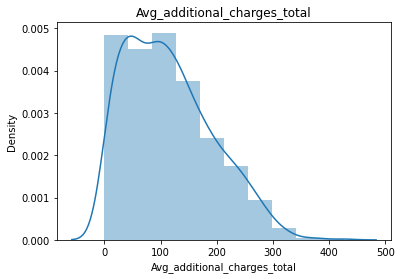

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


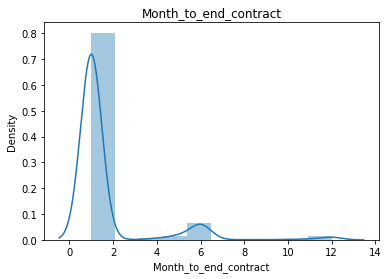

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


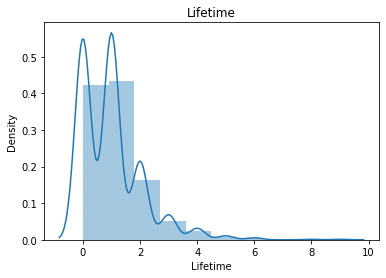

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


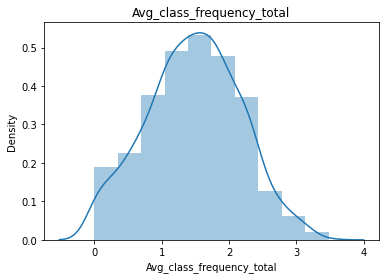

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


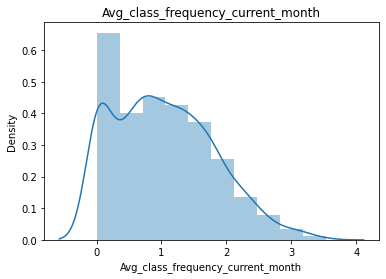

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


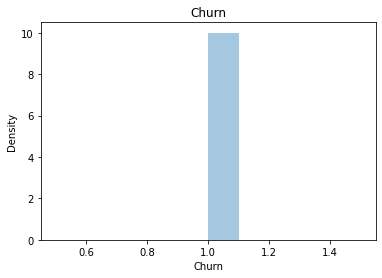

In [9]:
for feature in people_that_left.columns:
    sns.distplot(people_that_left[feature], bins=10)
    plt.title(feature)
    plt.show()

Según los gráficos, la distribución de los datos en ambos grupos es muy variada, especialmente en las columnas 'age', 'avg_additional_charges_total', 'lifetime', y 'avg_class_frequency_total'.

### Crea una matriz de correlación y muéstrala

In [23]:
corr_matrix = gym_data.corr()
corr_matrix

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708,0.001734
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098,0.541390
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986,-0.188673
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233,-0.057609
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177,-0.542817
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984,-0.330355
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325,-0.004873
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735,-0.083083
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697,-0.054047
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393,-0.321554


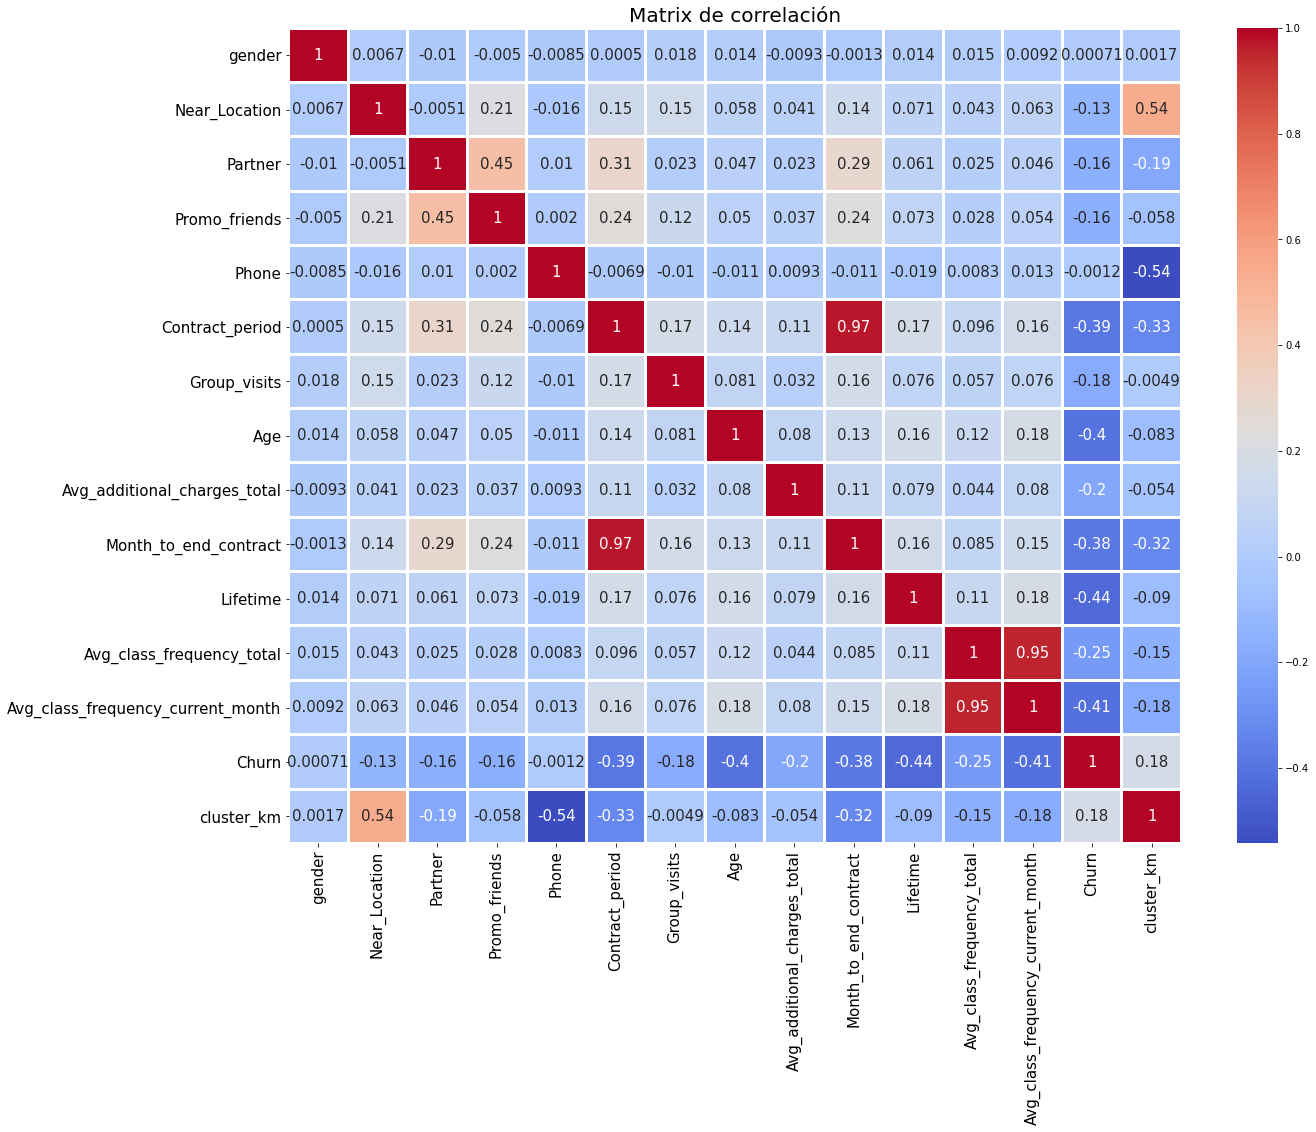

In [24]:
plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2, 
            annot_kws={'fontsize':15})
plt.title('Matrix de correlación', fontsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.show()   

Se puede observar en la matriz que hay variables que poseen una conexión débil y otras fuertes; sin embargo, no hay características propensas a darnos la respuesta correcta, pero hay algunas característcas correlacionadas. 

## Construir un modelo para predecir la cancelación de usuarios

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()

In [11]:
X = gym_data.drop('Churn', axis=1)
y = gym_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

El modelo entrenará el 80% de los datos y se comprobará a sí mismos con el 20% restante.

### Entrena el modelo en el set de entrenamiento con dos métodos

In [22]:
gym_onehot = pd.get_dummies(gym_data, columns=['Contract_period'])
gym_onehot

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km,Contract_period_1,Contract_period_6,Contract_period_12
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.020398,0.000000,0,4,0,1,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.922936,1.910244,0,1,0,0,1
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3,1,0,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.205633,3.357215,0,1,0,0,1
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12.0,8,2.284497,2.349070,0,1,0,0,1
3996,0,1,0,0,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3,1,0,0
3997,1,1,1,1,1,0,28,78.250542,11.0,2,2.786146,2.831439,0,1,0,0,1
3998,0,1,1,1,1,0,32,61.912657,5.0,3,1.630108,1.596237,0,1,0,1,0


In [12]:
model1 = RandomForestClassifier(random_state=0)
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions1)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions1)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions1)))

Exactitud: 0.92
Precisión: 0.84
Recall: 0.82


In [13]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions2)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions2)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions2)))

Exactitud: 0.92
Precisión: 0.87
Recall: 0.81


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


En ambos modelos, la exactitud se encuentra en un buen margen segun el 80% de las predicciones realizadas, y la precisión y recall aun tienen un margen de mejora. Sin embargo, las tres métricas en ambos modelos se encuentran en buena forma.

## Crear clústeres de usuarios

### Estandariza los datos

In [14]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma

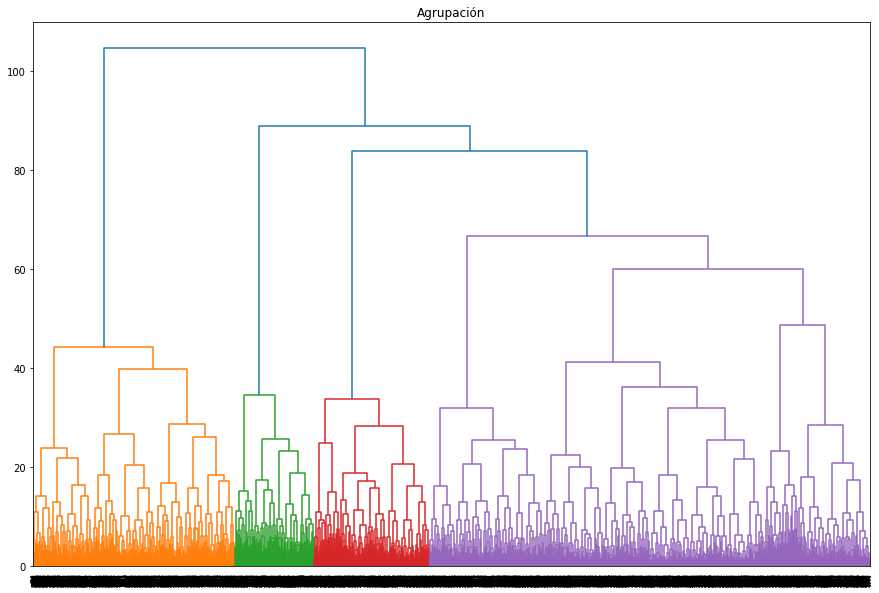

In [15]:
linked = linkage(X_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupación')
plt.show()

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes

In [16]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_sc)

### Mira los valores medios de característica para clústeres. ¿Hay algo que te llame la atención?

In [17]:
gym_data['cluster_km'] = labels
gym_data.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631940,2.224852,2.812623,1.662253,1.480228,0.441815
1,0.501478,0.960591,0.782266,0.574384,1.0,10.882759,0.540887,29.975369,160.732413,9.944828,4.718227,1.994058,1.987163,0.027586
2,0.555686,0.977726,0.355217,0.234467,1.0,2.576788,0.471278,30.141852,162.529615,2.375147,4.990621,2.812017,2.807857,0.069168
3,0.487490,1.000000,0.350282,0.236481,1.0,1.962066,0.340597,28.129944,130.398709,1.871671,2.345440,1.238880,1.000975,0.522195
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


Se puede apreciar que en los clusteres hay valores que son llamativos en algunas columnas, lo que puede significar que haya una relación significativa entre ambas partes.

### Traza distribuciones de características para los clústeres.

In [18]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(df[x_name], df[y_name], hue=df[cluster_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


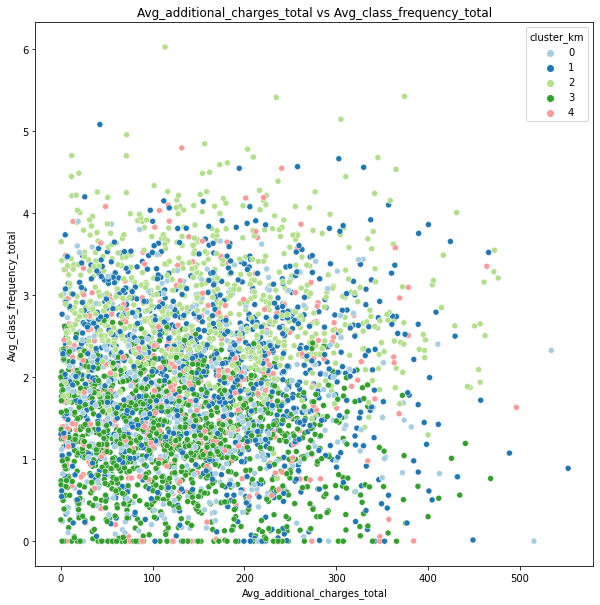

In [19]:
show_clusters_on_plot(gym_data, 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'cluster_km')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


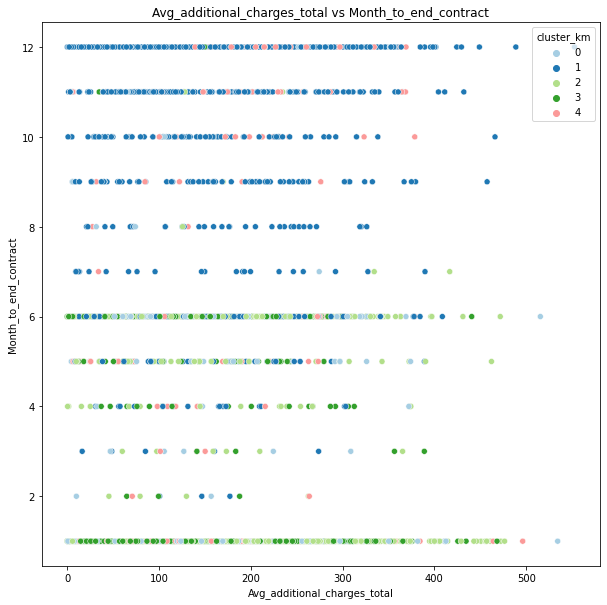

In [20]:
show_clusters_on_plot(gym_data, 'Avg_additional_charges_total', 'Month_to_end_contract', 'cluster_km')

Los parámetros de mes para terminar el contrato y el catgo adicional total resultaron ser características limítrofes para los clústeres. Como podemos ver en el gráfico de distribución pareado de estas variables, apenas se intersecan. En cambio, en el resto de parámetros son bastantes similares y no difieren tanto.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [21]:
gym_data.groupby('cluster_km').agg({'Churn': 'mean'})

,Churn
cluster_km,
0,0.441815
1,0.027586
2,0.069168
3,0.522195
4,0.266839


El cuarto grupo es más propenso en irse y el tercero es el más leal, y la mayoría difieren en términos de tasa de cancelación.

## Conclusión general

Después de analizar los datasets se pudo concluir lo siguiente:


1. Primero, se decidió analizar las informacione de los datsets, como los tipos de columnas, la cantidad de datos.
2. No se encontraron valores ausentes.
3. Se tuvo que trazar algunos histogramas para observar las distribuciones de algunas variables.
4. Se realizó la matriz de correlación, para observar las relaciones entre las variables.

Asimismo, se comprobó lo siguiente:

1. Después de realizar las métricas para la clasificación binaria para el pronóstico de la tasa de cancelación, se pudo observar que se encuentran en buena forma.

2. Se ealizó una estandarización de datos, y se pudo observar que la distancia entre las variables o características, no es muy lejana con la variable objetivo.

3. Se dividió el grupo de clientes en 5 grupos, y se obtuvo distintas relaciones y pocas distancias limítrofes entre las características. 

Después de analizar los datos y las pruebas de predicción con las distintas métricas, se puede concluir que existen distintos factores que influyen en la tasa de cancelación y la retención del cliente, como el pago promedio total, el periodo de contrato, el mes para finalizar, etc. Además, se recomienda lo siguiente para mejorar la interacción y retención con los clientes:

1. Personalización y mejora de la comunicación activa:
   - Enviar mensajes personalizados y relevantes a los clientes, utilizando canales de comunicación efectivos como correos electrónicos o notificaciones push en la aplicación móvil.
   - Ofrecer ofertas exclusivas o descuentos personalizados para incentivar la participación y mantener el interés del cliente.
   - Implementar un sistema de seguimiento de clientes para identificar patrones de comportamiento y preferencias individuales.
   
   
2. Mejora de la experiencia del cliente:
    - Realizar encuestas de satisfacción periódicas para recopilar comentarios y opiniones de los clientes sobre sus experiencias en el gimnasio.
   - Utilizar la retroalimentación de los clientes para identificar áreas de mejora y realizar cambios en los servicios y programas ofrecidos.
   - Proporcionar instalaciones y equipos de alta calidad, así como clases y actividades diversas que se adapten a los diferentes intereses y necesidades de los clientes.
   
   
3. Programas de fidelización y recompensas:
   - Implementar un programa de fidelización que recompense a los clientes por su lealtad y participación continua.
   - Ofrecer incentivos, como descuentos en la membresía, regalos o acceso a eventos exclusivos, a aquellos clientes que cumplan ciertos hitos o se comprometan con el gimnasio durante un período prolongado.
   - Establecer programas de referidos para alentar a los clientes satisfechos a recomendar el gimnasio a sus amigos y familiares.
   
   
Estos principios y ejemplos de implementación pueden ayudar a Model Fitness a mejorar la interacción con los clientes y aumentar la retención.